# 1. Carga de Datos

In [2]:
#Descargamos los datos
import requests
import os
import warnings

def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)

url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
filename = os.path.basename(url)

save_dir = os.path.join(os.path.pardir, "data", "raw")  # ../data/raw
save_path = os.path.join(save_dir, filename)

os.makedirs(os.path.dirname(save_path), exist_ok=True)

response = requests.get(url)
with open(save_path, 'wb') as f:
    f.write(response.content)

print(f"Archivo guardado en: {save_path}")

Archivo guardado en: ../data/raw/diabetes.csv


In [3]:
#Cargar el dataset
import pandas as pd

# Ruta relativa al archivo desde src/
csv_path = os.path.join(os.path.pardir, "data", "raw", "diabetes.csv")

# Cargar el dataset en una variable (DataFrame)
total_data = pd.read_csv(csv_path)

# 2. Análisis Exploratorio y Limpieza de Datos
This dataset originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases. The goal is to predict, based on diagnostic measures, whether or not a patient has diabetes.

- *Pregnancies*: Number of pregnancies of the patient (numeric)
- *Glucose*: Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
- *BloodPressure*: Diastolic blood pressure (measured in mm Hg) (numeric)
- *SkinThickness*: Triceps skin fold thickness (measured in mm) (numeric)
- *Insulin*: 2-hour serum insulin (measured in mu U/ml) (numeric)
- *BMI*: Body mass index (numeric)
- *DiabetesPedigreeFunction*: Diabetes Pedigree Function (numeric)
- *Age*: Age of patient (numeric)
- *Outcome*: Class variable (0 or 1), being 0 negative in diabetes and 1 positive (numeric)

In [4]:
#Obtener Dimensiones
print(total_data.shape)

#Obtener Información sobre los tipos de datos
print(total_data.info())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Hay un total de 768  filas (en este caso, pacientes) y 9 columnas, entre las cuales se encuentra la clase a predecir, ***Outcome***. No hay instancias con valores nulos. Todas las variables del conjunto de datos son numéricas.

**Eliminar Duplicados**

Como no tenemos alguna columna que pueda servir como id único, eliminamos las filas duplicadas sin filtrar por columna.

In [5]:
total_data.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


No había filas duplicadas.

**Eliminar Información Irrelevante**

En esta etapa tan temprana no eliminaremos ninguna columna, pues no hay datos identificativos de los clientes que resulten irrelevantes al análisis.

# Análisis Univariante

Hacemos un análisis de las variables del dataset. Para ello, graficaremos histogramas y boxplots.

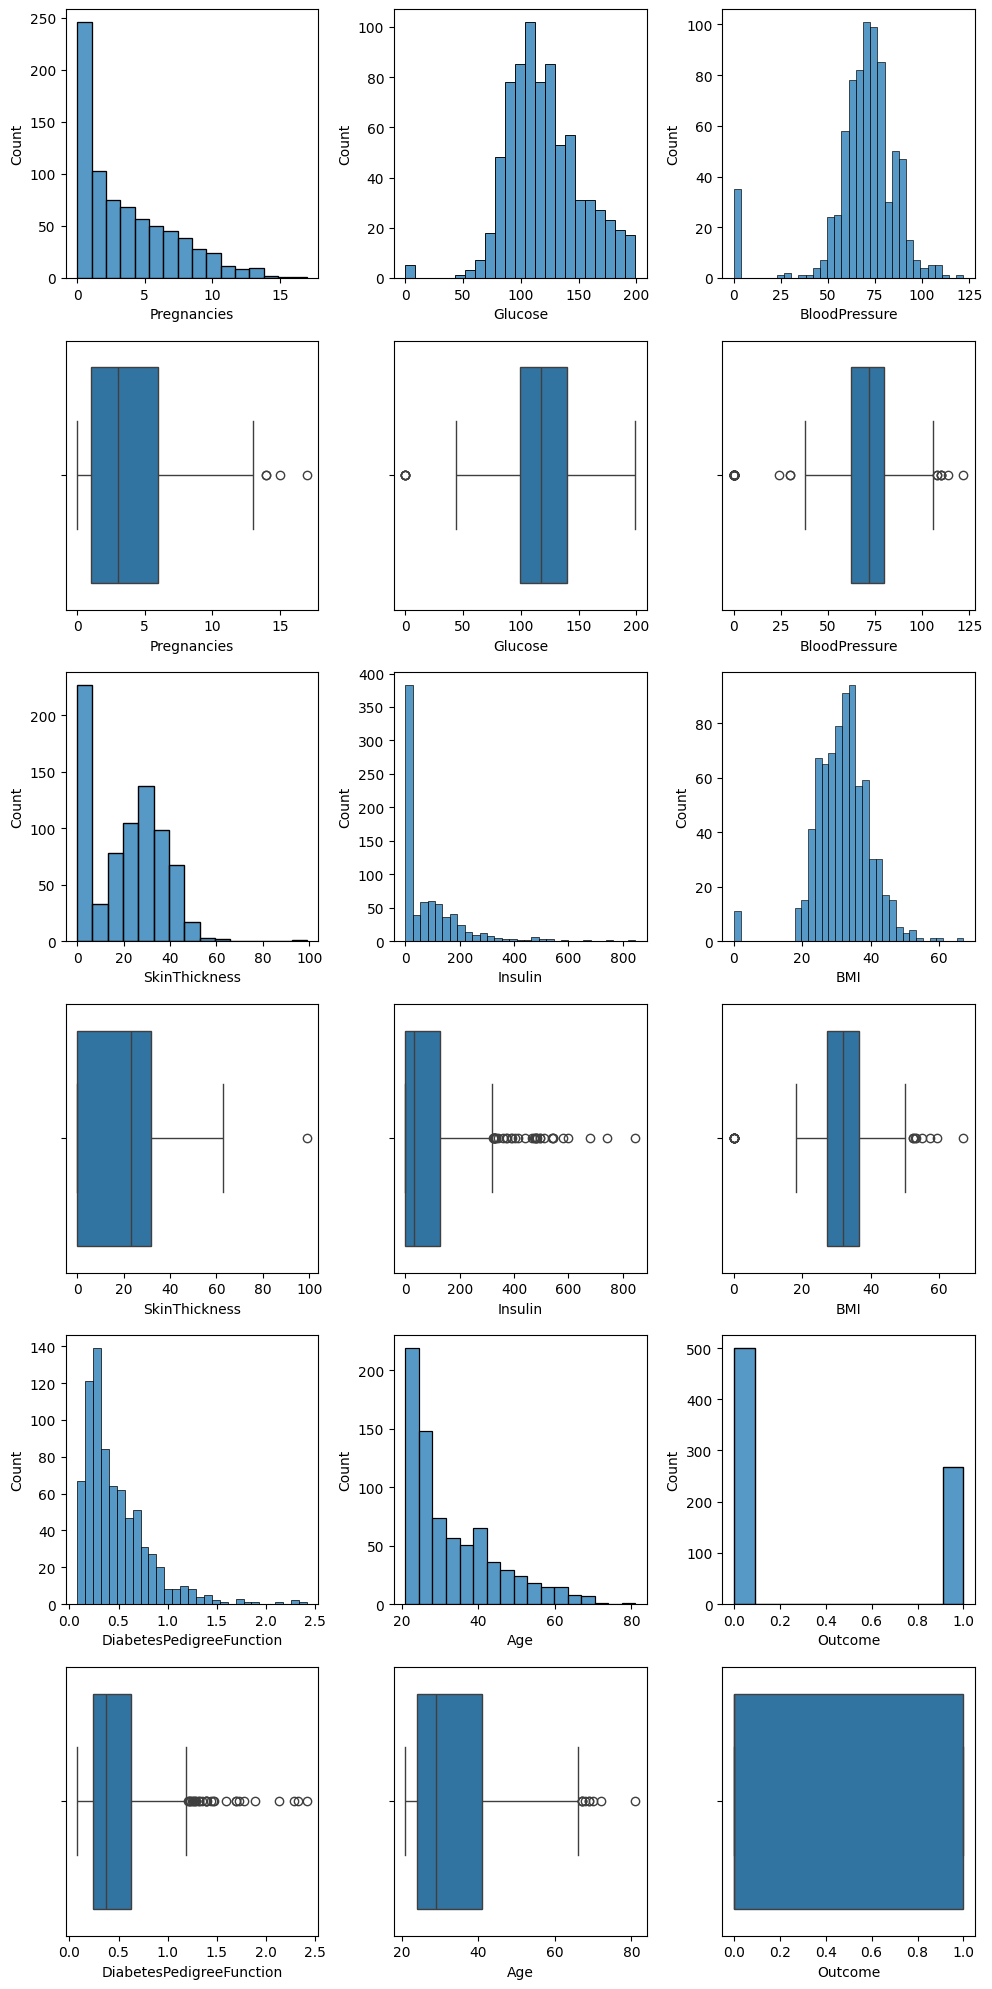

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(6, 3, figsize = (10, 20))

sns.histplot(ax = axis[0, 0], data = total_data, x = "Pregnancies")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "Pregnancies")
sns.histplot(ax = axis[0, 1], data = total_data, x = "Glucose")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "Glucose")
sns.histplot(ax = axis[0,2], data = total_data, x = "BloodPressure")
sns.boxplot(ax = axis[1,2], data = total_data, x = "BloodPressure")
sns.histplot(ax = axis[2,0], data = total_data, x = "SkinThickness")
sns.boxplot(ax = axis[3,0], data = total_data, x = "SkinThickness")
sns.histplot(ax = axis[2,1], data = total_data, x = "Insulin")
sns.boxplot(ax = axis[3,1], data = total_data, x = "Insulin")
sns.histplot(ax = axis[2,2], data = total_data, x = "BMI")
sns.boxplot(ax = axis[3,2], data = total_data, x = "BMI")
sns.histplot(ax = axis[4,0], data = total_data, x = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[5,0], data = total_data, x = "DiabetesPedigreeFunction")
sns.histplot(ax = axis[4,1], data = total_data, x = "Age")
sns.boxplot(ax = axis[5,1], data = total_data, x = "Age")
sns.histplot(ax = axis[4,2], data = total_data, x = "Outcome")
sns.boxplot(ax = axis[5,2], data = total_data, x = "Outcome")

plt.tight_layout()
plt.show()

- *Pregnancies*: Hay una mayor dispersión de los datos a la derecha de la mediana, con algunos valores atípicos.
- *Glucose*: La distribución de los datos se asemeja mucho a una normal, con una pequeña asimetría. Los datos están ligeramente más dispersos a la izquierda de la mediana y hay algunos valores atípicos.
- *BloodPressure*: La distribución de los datos se asemeja mucho a una normal. Los datos están ligeramente más dispersos a la izquierda de la mediana y hay algunos valores atípicos.
- *SkinThickness*: La distribución de los datos se asemeja mucho a una normal. Los datos están ligeramente más dispersos a la derecha de la mediana y hay algunos valores atípicos.
- *Insulin*: Hay una mayor dispersión de los datos a la derecha de la mediana, con algunos valores atípicos.
- *BMI*: La distribución de los datos se asemeja mucho a una normal, con una pequeña asimetría. La dispersión de los datos es bastante similar a la izquierda y a la derecha de la semana y hay algunos valores atípicos.
- *DiabetesPedigreeFunction*: Hay una mayor dispersión de los datos a la derecha de la mediana, con algunos valores atípicos.
- *Age*: Hay una mayor dispersión de los datos a la derecha de la mediana, con algunos valores atípicos.
- *Outcome*: Sólo hay dos valores, 0 y 1. La mayoría de los pacientes no tiene diabetes.

**Análisis Multivariante**

Al sólo tener variables numéricas, pasaremos directamente al análisis de correlaciones.

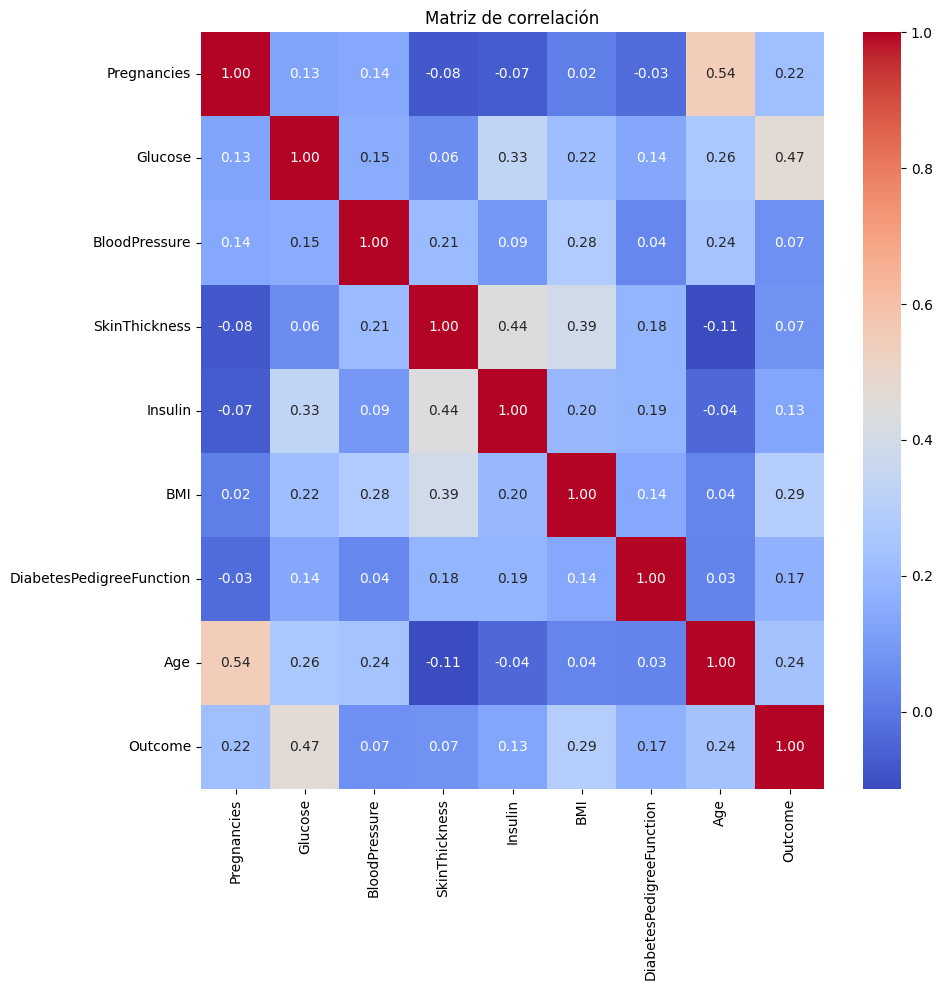

In [7]:
fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(total_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Matriz de correlación")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

Vemos que no parece haber ningún par de variables con una correlación lo suficientemente alta como para determinar que existe redundancia en los datos.

Tenemos correlaciones que tienen sentido dentro del contexto, como *Pregnancies* y *Age* (es más probable que personas de mayor edad hayan tenido embarazos) o *Insulin* y *Glucose* (altos niveles de glucosa pueden estar asociados a altos niveles de insulina).

La variable *BMI* tiene una correlación positiva moderada con otras variables como *SkinThickness*, *BloosPressure*, *Glucose* e *Insulin*.

Las variables predictivas con mayor correlación con la variable objetivo *Outcome* son *Glucose*, *BMI* y *Age*.

# Ingeniería de Características

**Análisis de Outliers**

In [8]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Eliminaremos aquellos valores atípicos que puedan afectar el análisis.

In [9]:
total_data_CON_outliers = total_data.copy()

total_data_SIN_outliers = total_data.copy()

In [10]:
# Para cada una de las variables con outliers en mi problema, tengo que reemplazar sus valores del DF
def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: (x if (x <= upper_limit) else upper_limit) if not pd.isna(x) else np.nan)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: (x if (x >= lower_limit) else lower_limit) if not pd.isna(x) else np.nan)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
  total_data_SIN_outliers, limit_list = replace_outliers_from_column(column, total_data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'Pregnancies': [0, np.float64(13.5)],
 'Glucose': [np.float64(37.125), np.float64(202.125)],
 'BloodPressure': [np.float64(35.0), np.float64(107.0)],
 'SkinThickness': [0, np.float64(80.0)],
 'Insulin': [0, np.float64(318.125)],
 'BMI': [np.float64(13.35), np.float64(50.550000000000004)],
 'DiabetesPedigreeFunction': [0.078, np.float64(1.2)],
 'Age': [21, np.float64(66.5)]}

In [11]:
total_data_SIN_outliers.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,20.511719,73.652669,32.125065,0.458914,33.199870,0.348958
std,3.344157,31.187468,14.197239,15.844744,93.576029,7.049584,0.285596,11.628404,0.476951
min,0.000000,37.125000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,107.000000,80.000000,318.125000,50.550000,1.200000,66.500000,1.000000


**Escalado de Valores**

Al estar trabajando con árboles de decisión, no es necesario hacer un escalado o normalización de los datos.

**Dividimos los Dataset en datos de entrenamiento y pruebas**

In [12]:
from sklearn.model_selection import train_test_split

num_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Dividimos el conjunto de datos en muestras de train y test
X_CON = total_data_CON_outliers.drop('Outcome', axis = 1)[num_variables]
y = total_data_CON_outliers['Outcome']
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)

X_SIN = total_data_SIN_outliers.drop('Outcome', axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

**Guardamos los Dataset**

In [13]:
import openpyxl

X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)

X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)

y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)


# Selección de Características

In [14]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np


def best_k(x_train, y_train):
    scores = []

    for k in range(1, x_train.shape[1] + 1):
        selector = SelectKBest(score_func=f_regression, k=k)
        X_new = selector.fit_transform(x_train, y_train)

        model = LinearRegression()
        cv_score = cross_val_score(model, X_new, y_train, cv=5, scoring='r2').mean()
        scores.append(cv_score)

    # Mostrar el k con mejor score
    best_k = np.argmax(scores) + 1
    return best_k

**X_train_con_outliers**

In [15]:
from sklearn.feature_selection import f_regression, SelectKBest

k = best_k(X_train_con_outliers, y_train)

selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train_con_outliers, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers), columns = X_train_con_outliers.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers), columns = X_test_con_outliers.columns.values[ix])

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0


**X_train_sin_outliers**

In [16]:
from sklearn.feature_selection import f_regression, SelectKBest

k = best_k(X_train_sin_outliers, y_train)

selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train_sin_outliers, y_train)

ix = selection_model.get_support()
X_train_sin_outliers_sel = pd.DataFrame(selection_model.transform(X_train_sin_outliers), columns = X_train_sin_outliers.columns.values[ix])
X_test_sin_outliers_sel = pd.DataFrame(selection_model.transform(X_test_sin_outliers), columns = X_test_sin_outliers.columns.values[ix])

X_train_sin_outliers_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,35.0,0.000,13.35,0.304,21.0
1,9.0,112.0,82.0,0.000,28.20,1.200,50.0
2,1.0,139.0,46.0,83.000,28.70,0.654,22.0
3,0.0,161.0,50.0,0.000,21.90,0.254,65.0
4,6.0,134.0,80.0,318.125,46.20,0.238,46.0


Para ambos datasets, sólo se descartó la variable predictora *SkinThickness*.

**Guardamos los CSV con las características seleccionadas**

In [17]:
X_train_sin_outliers_sel.to_csv("../data/processed/X_train_sel.csv", index=False)
X_test_sin_outliers_sel.to_csv("../data/processed/X_test_sel.csv", index=False)

X_train_sin_outliers_sel.to_csv("../data/processed/X_train_sin_outliers_sel.csv", index=False)
X_test_sin_outliers_sel.to_csv("../data/processed/X_test_sin_outliers_sel.csv", index=False)

# Árbol de Decisión

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

datasets = [
    X_train_con_outliers,
    X_train_sin_outliers,
]

test_sets = [
    X_test_con_outliers,
    X_test_sin_outliers,
]

results = []
models = []

for X_train, X_test in zip(datasets, test_sets):
    model = DecisionTreeClassifier(random_state = 42)
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred_test)
    results.append(acc)
    models.append((model, y_pred_test))

print(results)
best_index = results.index(max(results))
print("Mejor conjunto de datos:", best_index)

[0.7467532467532467, 0.7337662337662337]
Mejor conjunto de datos: 0


El mejor dataset es X_train_con_outliers.

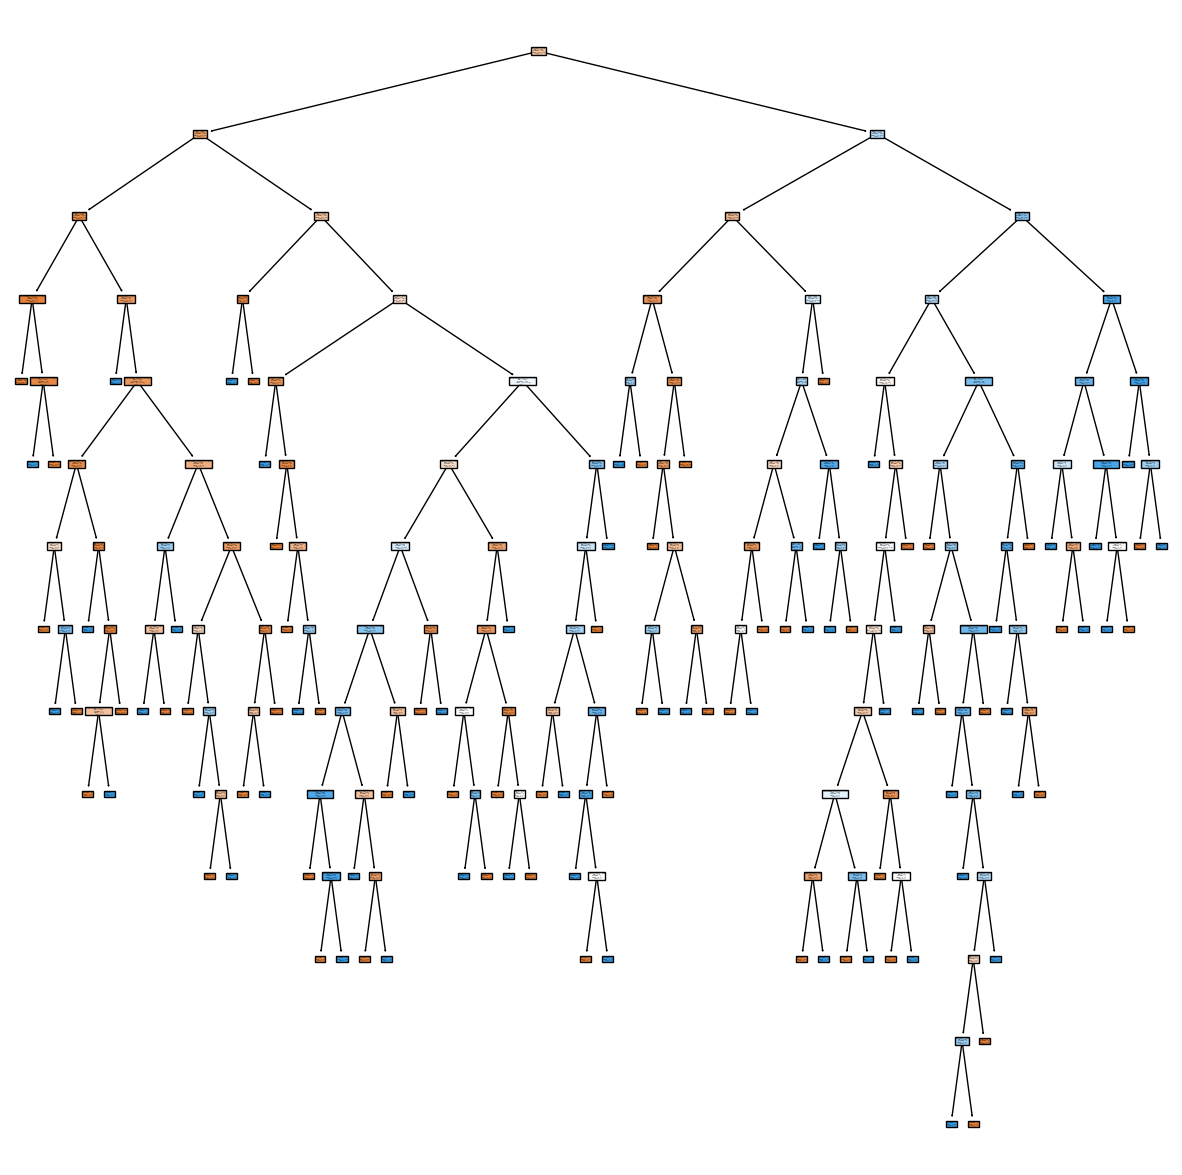

In [19]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15, 15))

tree.plot_tree(
    model,
    feature_names=list(X_train.columns),
    class_names=["0", "1"],
    filled=True
)

plt.show()

In [20]:
from sklearn.tree import export_text

# Exportar el árbol en formato de texto
tree_rules = export_text(
    model,
    feature_names=list(X_train.columns),
    show_weights=True  # Opcional, muestra los pesos de cada clase
)

print(tree_rules)

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.95
|   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |--- weights: [108.00, 0.00] class: 0
|   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.69
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- DiabetesPedigreeFunction >  0.69
|   |   |   |   |   |--- weights: [15.00, 0.00] class: 0
|   |   |--- BMI >  30.95
|   |   |   |--- BloodPressure <= 39.50
|   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |--- BloodPressure >  39.50
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- SkinThickness <= 8.50
|   |   |   |   |   |   |--- Glucose <= 109.50
|   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |--- Glucose >  109.50
|   |   |   |   |   |   |   |--- Glucose <= 123.00
|   |   |   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   | 

Vemos que el árbol de decisión tiene 7 niveles (uno por cada variable predictiva) y finalmente las hojas, que indican si el paciente tiene o no riesgo de padecer de diábetes.

- En el primer nivel está *BMI*, que es la variable que ofrece la mejor ganancia de información para dividir los datos, marcando el límite en 30,95.

- Luego está *Age*, dividiendo los datos en aquellos superiores o inferiores a 28,5.

- El siguiente nivel es *DiabetesPedigreeFunction *.

Luego, dependiendo de la decisión que se tome en el árbol, están los niveles , *BloodPressure*, *SkinThickness*, *Glucose*... Esto va a variar de acuerdo a la decisión que se tome.



**Optimización de los Resultados**

Al tener un Accuracy del 0.7467532467532467, podemos intentar mejorar el modelo.

In [21]:
best_model, best_y_pred = models[best_index]

best_model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [22]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator = best_model,
    param_grid = hyperparams,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [23]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid_search.fit(X_train_con_outliers, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor accuracy (CV):", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mejor accuracy (CV): 0.759016393442623


Usamos los mejores hiperparámetros obtenidos al evaluar cada posibilidad.

In [24]:
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy en test:", accuracy_score(y_test, y_pred))

Accuracy en test: 0.7597402597402597


El modelo mejora ligeramente.

**Guardamos el Modelo**

In [25]:
import pickle

pickle.dump(best_tree, open("../models/decision_tree.sav", "wb"))